# Introduction

```sql

-- The query only shows databases that the USER has the privilege of viewing.
SHOW DATABASES;

-- Change Database. 
-- To tell the DBMS that we want our queries directed to the specified database.
-- Any queries we execute in the future are directed to the selected database.
USE mysql;

-- To view the query, see how the database was created.
SHOW CREATE DATABASE mysql;

-- Show tables of the active database.
SHOW TABLES;

-- To describe the details of a table.
DESCRIBE user;

-- To view the query, see how the table was created.
SHOW CREATE TABLE servers;

-- Display the column information for a table
SHOW COLUMNS FROM servers;
```

# Create Database

```sql
-- Query 1
CREATE DATABASE MovieIndustry;

-- Query 2
CREATE DATABASE IF NOT EXISTS MovieIndustry;

-- Query 3
SHOW DATABASES;

-- Query 4
DROP DATABASE MovieIndustry;
```

# Data Types




The major categories of various data-types are as follows:
* **Numeric** e.g., INT, BIGINT, TINYINT, DECIMAL, etc.
* **Date and Time** e.g., DATE, TIME, TIMESTAMP, YEAR, etc.
* **String** e.g., VARCHAR, CHAR, ENUM, SET, BLOB, etc.
* **JSON**
* **Spatial Data** represents the location, size, and shape of an object on planet Earth such as a building, lake, mountain, or township. MySQL also supports spatial data types, e.g., GEOMETRY, POINT, etc.

**Actors** table with the following columns and associated datatypes:

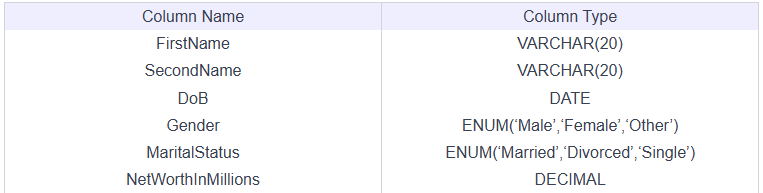

> * **`INTEGER`** or **`INT`**
> * **`DECIMAL(p,s)`** or **`DEC(p,s)`** | p -> Total gigits | s -> Digits after decimal
> * **`CHAR(size)`**
> * **`DATE`** | Standard SQL date format -> YYYY-MM-DD

# Create, Insert, Update & Delete

> The syntax for defining a column is as follows:
> 
> **`columnName columnType [NOT NULL | NULL] [DEFAULT columnValue]`**

**Create**

```mysql
CREATE TABLE Products(
    productID INT,
    productName CHAR(100),
    category CHAR(50),
    price DECIMAL(8,2),
    stockQuantity INT,
    PRIMARY KEY (productID)    
);

DESCRIBE Products;

---

CREATE TABLE IF NOT EXISTS Actors (
Id INT AUTO_INCREMENT,
FirstName VARCHAR(20) NOT NULL,
SecondName VARCHAR(20) NOT NULL,
DoB DATE NOT NULL,
Gender ENUM('Male','Female','Other') NOT NULL,
MaritalStatus ENUM('Married', 'Divorced', 'Single', 'Unknown') DEFAULT "Unknown",
NetWorthInMillions DECIMAL NOT NULL,
PRIMARY KEY (Id));

DESCRIBE Actors;
```

The **auto-increment sequence begins at 1** for an empty table. 

The following restrictions exist when using `the AUTO_INCREMENT` feature:
* There can be only one column marked as `AUTO_INCREMENT` in a table.
* The `AUTO_INCREMENT` column can’t have a default value.
* The `AUTO_INCREMENT` column must be indexed.
* The `AUTO_INCREMENT` feature isn’t portable to other databases and the counter is reset when we truncate or drop a table.

We can also use `NOT NULL` and `DEFAULT` together.


# Insert Data

```sql
-- Query 1
INSERT INTO SalesData (SaleID, SalesPerson, SaleDate, ProductCategory, ProductName, SalesAmount)
VAlUES (16, 'Mary Jones', '2023-10-15', 'Electronics', 'New Smartphone', 800),
VAlUES (17, 'Kiran Jones', '2023-10-15', 'Electronics', 'New Smartphone', 800),
VAlUES (18, 'Paul Jones', '2023-10-15', 'Electronics', 'New Smartphone', 800);

-- Query 2
--  If a column doesn’t have a default value defined, it is assigned NULL as a default.
INSERT INTO Actors VALUES (DEFAULT, "Dream", "Actress", "9999-01-01", "Female", "Single", 000.00);

-- Query 3
-- If a column doesn’t have a default value defined, it is assigned NULL as a default.
INSERT INTO Actors VALUES (NULL, "Reclusive", "Actor", "1980-01-01", "Male", "Single", DEFAULT);

-- Query 4
-- Insert a row with all default values. If a column doesn’t have a default value defined, it is assigned NULL as a default. 
-- The query will fail if any one of the table columns is specified as not-null and doesn't have a DEFAULT value specified.
INSERT INTO Actors () VALUES ();
```

> The default value for a **TIMESTAMP** column is the current timestamp.

**Alternatively**:

```sql
-- Query 5
INSERT INTO Actors SET DoB="1950-12-12", FirstName="Rajnikanth", SecondName="",  Gender="Male", NetWorthInMillions=50,  MaritalStatus="Married";
```

**Session Variable**

```mysql
SET @EmpID = 5;
SET @EmpName = 'Aliza John';
SET @Salary = 65000;

INSERT INTO Employees (EmpID, EmpName, Salary)
VALUES (@EmpID, @EmpName, @Salary);
```

# Temporary Table

MySQL allows us to create temporary tables. 
* Temporary tables are persisted for the duration of the MySQL monitor session and removed once the session is terminated.
* The user doesn’t need to explicitly clean up a temporary table.

Monitor is the program that displays the MySQL prompt in the terminal.

**Syntax**:
```mysql
CREATE TEMPORARY TABLE tableName (
col1 <dataType> <Restrictions>,
col2 <dataType> <Restrictions>,
col3 <dataType> <Restrictions>,
<Primary Key or Index definitions>);
```

**Example**:

```mysql
CREATE TEMPORARY TABLE ActorNames (FirstName CHAR(20));
```

* Temporary tables can be used to work with intermediate data or results. 
* Also, complex queries with joins or nested queries can be broken up and worked on step-by-step by storing intermediate results in temporary tables.

# Collation & Character Sets

A character set defines what characters MySQL can store.

A database may contain characters from non-English languages. While a collation set decides how strings are ordered. For example, languages often share characters. A character may occur at different positions in the alphabet of different languages. An example is the ü character, which occurs at different positions in the German, Swedish, and Finnish alphabets.

```mysql
-- List the available character sets on the server
SHOW CHARACTER SET;

-- List the collations
SHOW COLLATION;

-- Inspect the defaults for your server
SHOW VARIABLES LIKE "c%";
```

# Querying Data

```sql

SELECT * FROM SalesData;

SELECT SaleDate, SalesPerson, ProductName, SalesAmount
FROM SalesData;

SELECT * FROM SalesData WHERE SalesAmount > 200;

SELECT SaleDate, SalesPerson, ProductName, SalesAmount
FROM SalesData
WHERE SalesPerson='Alice Webster';

SELECT DISTINCT SalesPerson FROM SalesData;

-- select distinct combinations of SalesPerson, ProductName
SELECT DISTINCT SalesPerson, ProductName FROM SalesData;

```

# Logical Operators

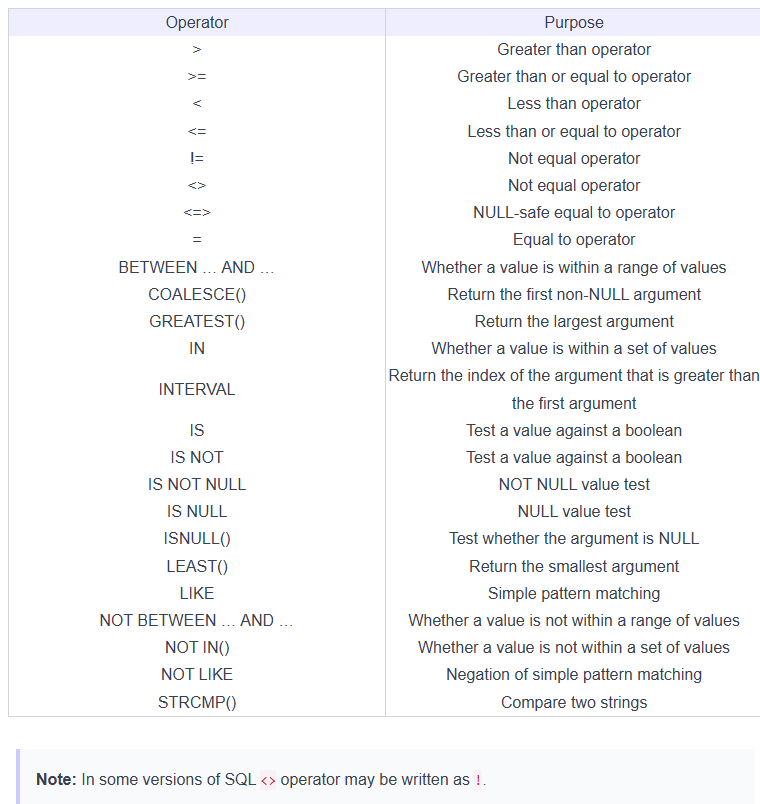

```sql
SELECT * FROM SalesData
WHERE ProductCategory='Clothing' AND SalesPerson='Alice Webster';

SELECT * FROM SalesData
WHERE ProductCategory='Clothing' AND SalesAmount > 150;

SELECT * FROM SalesData
WHERE NOT ProductCategory='Electronics';
```


# LIKE Operator

```sql
-- Query 1
SELECT * from Actors WHERE FirstName LIKE "Jen%";

-- Query 2
SELECT * from Actors where FirstName LIKE "Jennifer%";

-- Query 3
SELECT * from Actors where FirstName LIKE "%";

-- Query 4
SELECT * from Actors WHERE FirstName LIKE "_enn%";

-- Query 5
SHOW DATABASES LIKE "M%";

-- Query 6
SHOW TABLES LIKE "A%";
```

# Combining Conditions: AND, OR, NOT

```mysql
-- Query 1
SELECT * FROM Actors WHERE FirstName > "B" AND NetWorthInMillions > 200;

-- Query 2
SELECT * FROM Actors WHERE FirstName > "B" OR NetWorthInMillions > 200;

-- Query 3
SELECT * FROM Actors WHERE (FirstName > 'B' AND FirstName < 'J') OR (SecondName >'I' AND SecondName < 'K');

-- Query 4
SELECT * FROM Actors WHERE NOT(FirstName > "B" OR NetWorthInMillions > 200);

-- Query 5
SELECT * FROM Actors WHERE NOT NetWorthInMillions = 200;

-- Query 6

SELECT * FROM Actors WHERE (NOT NetWorthInMillions) = 200;

-- The NOT operator is applied to the column NetWorthInMillions, which has all non-zero values for all the rows in the table. 
-- Applying NOT on a non-zero column value makes it a zero, and since zero isn’t equal to 200, no rows are displayed.
-- Also note that if the table had a row with a zero value for the column NetWorthInMillions, it would still not display anything because NOT of zero is non-zero, which isn’t equal to 200.

-- Query 7

SELECT * FROM Actors WHERE FirstName > "B" XOR NetWorthInMillions > 200;

-- MySQL supports exclusive OR through the XOR operator. Exclusive OR returns true when one of the two conditions is true. 
-- If both conditions are true, or both are false, the result of the XOR operations is false.
```

# ORDER BY & LIMIT

**ORDER BY**

By default, the sorting is **case-insensitive** and in **ascending order**. 

**Sort with multiple keys**: If a tie occurs based on the first sort key, the second sort key will be used to determine the order of the tie.

```mysql

SELECT * FROM Actors ORDER BY FirstName;

SELECT * FROM Actors ORDER BY FirstName DESC;

SELECT * FROM Actors ORDER BY NetWorthInMillions, FirstName;

-- Control the ascending or descending order we desire for each sort key. 
SELECT * FROM Actors ORDER BY NetWorthInMillions DESC, FirstName ASC;

-- Sort order is undefined in case sort keys have the same value for rows.
-- MySQL ignores case when comparing strings in the ORDER BY clause, which implies strings “Kim”, “kIm”, and “kim” are treated equally. 
-- If we want ASCII comparison, we need to specify the BINARY keyword before the sort key. 
-- Note that upper-case letters appear before lower-case letters in ASCII ordering.
SELECT * FROM Actors ORDER BY BINARY FirstName;

-- The NetWorthInMillions column is sorted numerically from smallest to largest. 
-- We can also sort the NetWorthInMillions column as if strings using the CAST function as follows.
SELECT * FROM Actors ORDER BY CAST(NetWorthInMillions AS CHAR);

```

> The **CAST** function can also be used with the ORDER BY clause. The **CAST** function allows us to treat a column as a different type.

**LIMIT Clause**
* Usually, tables in a production environment have thousands or millions of rows, and a select query may return several hundred matched rows.
* This is problematic because outputting thousands of rows on the console or a network connection can overwhelm the end-user in the former and is impractical in the latter scenario.
* The `LIMIT` clause allows us to restrict the number of rows returned from the result of a select query.

**To find the top three actors by net worth**

```mysql
SELECT FirstName, SecondName from Actors ORDER BY NetWorthInMillions DESC LIMIT 3;
```

**Next 4 richest actors after the top three**

```mysql
-- To retrieve the next 4 richest actors after the top three. 
-- We can do so by specifying the number of rows we want after the top three rows using the OFFSET keyword.
SELECT FirstName, SecondName from Actors ORDER BY NetWorthInMillions DESC LIMIT 4 OFFSET 3;

-- LIMIT <offset>, <number_of_row_to_print>;
SELECT FirstName, SecondName from Actors ORDER BY NetWorthInMillions DESC LIMIT 3,4;
```



# Deleting Data

* We can delete rows from a table using the DELETE statement.
* A delete statement deletes an entire row and not individual columns.
* If changing a particular column value for a row is desired, use the UPDATE statement, which we will cover next.
* Also, realize that deleting all the rows of a table doesn’t delete the table itself.

```mysql
DELETE FROM SalesData WHERE SaleID=4;

-- delete the top three actresses by net worth
DELETE FROM Actors ORDER BY NetWorthInMillions DESC LIMIT 3;
```

# Truncate Data

* If we intend to delete all the rows from a table then a faster route is to use the **TRUNCATE** statement. 
* Generally, we don’t want to delete all the table rows except in the case of temporary tables.
* The **TRUNCATE** statement drops a table and recreates it for faster processing.
* MySQL doesn’t count the number of rows affected and may show the count to be zero or non-zero, but the number doesn’t reflect the actual number of rows affected.

```mysql
TRUNCATE Actors;
```

> *Note that **TRUNCATE** doesn’t work with locking or transactions and is the equivalent of **DELETE** when used with **InnoDB** tables. **InnoDB** refers to a particular type of database engine.*

# Update Data

* We can use the `UPDATE` statement to change the value of a column for a row or multiple rows.
* We can use `LIMIT` and `ORDER BY` in conjunction to restrict the effects of the update statement. 
* Say, we want to increase the net worth of the first three actors, sorted by first name, to five million dollars.

```sql
UPDATE SalesData SET SalesPerson='Mary Jones', SalesAmount=35 WHERE SaleID=3;

-- Increase the net worth of the first three actors, sorted by first name, to five million dollars.
UPDATE Actors SET NetWorthInMillions=5 ORDER BY FirstName LIMIT 3;
```

# Alter Table

MySQL allows us to rename tables, add, remove, or rename columns, change the type of an existing column, etc.

**MYSQL IMPLEMENTATION**

**SYNTAX**: `ALTER TABLE table CHANGE oldColumnName newColumnName <datatype> <restrictions>;`

**EXAMPLES**:       

```mysql
-- RENAME COLUMN
ALTER TABLE Actors CHANGE FirstName First_Name varchar(120);

-- CHANGE TYPE & CONSTRAINTS
ALTER TABLE Actors MODIFY First_Name varchar(20) DEFAULT "Anonymous";

-- RENAME, CHANGE TYPE & CONSTRAINTS
ALTER TABLE Actors CHANGE First_Name First_Name varchar(20) DEFAULT "Anonymous";

-- CHANGE TYPE (DATA LOSS)
ALTER TABLE Actors MODIFY First_Name INT;
-- Be cautious when trying to change the type of an existing column. 
-- For instance, if we try to change the first name column from type varchar to int, we’ll run into an error because the conversion is nonsensical.

-- CHANGE TYPE (NO DATA LOSS)
ALTER TABLE Actors MODIFY First_Name varchar(300);
-- Convert the type of a column that doesn’t result in data loss.

-- ADD COLUMN
ALTER TABLE Actors ADD MiddleName varchar(100);

-- DROP COLUMN
ALTER TABLE Actors DROP MiddleName;
-- If an index is defined on a column, dropping the column also removes the index, if the index consists of only that one column.

-- ADD COLUMN and control the position of the new column within the table using the FIRST or AFTER keyword.
ALTER TABLE Actors ADD MiddleName varchar(100) FIRST;
ALTER TABLE Actors ADD MiddleName varchar(100) AFTER DoB;

```

* We can combine several alterations in a single MySQL statement separated by a comma.
* In fact, combining alterations is much more efficient as it avoids the cost of creating a new table, copying data from the old table to the new, dropping the old table, and renaming the old table to the new table for each alteration.
* In the example below, we drop the middle name column and recreate it using a slightly different column name, all in a single statement.

```mysql
-- MULTIPLE ALTERATIONS

ALTER TABLE Actors 
DROP MiddleName, 
ADD Middle_Name varchar(100);
````

```mysql
/* Change datatype of a column */
ALTER TABLE TableName
MODIFY      ColumnName datatype;

/* Multiple columns in a table can be modified as follows */
ALTER TABLE TableName
MODIFY      (ColumnName1 datatype1,
            ColumnName2 datatype2,
            ColumnName3 datatype3,
            ...
            ColumnNamen datatypen
            );
```
> * For some alter operations under the hood, MySQL creates a new table with the requested alter changes, copies the data from the old table to the new one, deletes the old table, and then renames the new table to Actors.
> * An alter operation can be expensive if the table needs to be rebuilt.

---

---

**POSTGRES IMPLEMENTATION**

**Add column**

```postgresql

ALTER TABLE SalesData
ADD Quantity INT NOT NULL,
ADD Price DECIMAL(8,2) NOT NULL;

```

**Drop column**

```postgresql

ALTER TABLE SalesData
DROP COLUMN ProductName,
DROP COLUMN ProductCategory,
DROP COLUMN price; 

```

**Rename column**

```postgresql

ALTER TABLE SalesData
RENAME COLUMN price TO ProductPrice;

```

**Change data type of a column**

```postgresql

ALTER TABLE SalesData
ALTER COLUMN ProductPrice TYPE INT;

```

**Rename table**

```postgresql

ALTER TABLE old_table_name
RENAME TO new_table_name;

```

**Add constraints**

```postgresql

ALTER TABLE SalesData
ADD CONSTRAINT my_constraint FOREIGN KEY (ProductID) REFERENCES Product(ProductID)

```

**Delete constraints**

```postgresql

ALTER TABLE my_table 
DROP CONSTRAINT my_constraint;

```


# Aliasing

* Aliases are like nicknames, a temporary name given to a table or a column to write expressive and readable queries. 
* We can use aliases with columns, tables, and MySQL functions.

> Aliases can be used in `GROUP BY`, `HAVING`, and `ORDER BY` clauses.
>
> Notably, aliases for columns can’t be used in the `WHERE` clause, but aliases for tables can.

**Column Aliasing**

```mysql
SELECT SaleID, SalesAmount AS SAmount, Quantity * Price AS TotalAmount FROM SalesData;

SELECT CONCAT(FirstName,' ', SecondName) AS FullName FROM Actors ORDER BY FullName;

SELECT CONCAT(FirstName,' ', SecondName) FROM Actors ORDER BY CONCAT(FirstName,' ', SecondName);
```

**Table Aliasing**

```mysql
SELECT t1.SaleID, t1.SalesAmount FROM SalesData AS t1;

SELECT FirstName FROM Actors AS tbl WHERE tbl.FirstName='Brad' AND tbl.NetWorthInMillions > 200;

SELECT tbl.FirstName FROM Actors AS tbl WHERE tbl.FirstName='Brad' AND tbl.NetWorthInMillions > 200;
```

**Other Examples**

```mysql
SELECT t1.FirstName, t1.NetworthInMillions
FROM Actors AS t1,
Actors AS t2
WHERE t1.NetworthInMillions = t2.NetworthInMillions
AND t1.Id != t2.Id;
```


# DISTINCT

* The `DISTINCT` clause can be used to output unique rows in a result set. 
* Remember, `DISTINCT` is a post-processing filter, meaning it is applied to the resulting rows of a query.

**Fetch the lowest 5 SalesAmount**

```sql
SELECT DISTINCT SalesPerson, SalesAmount
FROM SalesData
ORDER BY SalesAmount ASC
LIMIT 5;
```

**Fetch the top 5 SalesAmount**

```sql
SELECT DISTINCT SalesPerson, SalesAmount
FROM SalesData
ORDER BY SalesAmount DESC
LIMIT 5;
```

# Aggregate Methods

**Count unique SalesPerson**

```mysql
SELECT COUNT(DISTINCT SalesPerson) FROM SalesData;
```

**Min & Max SalesAount**

```mysql
SELECT MIN(SalesAmount), MAX(SalesAmount) FROM SalesAmount;
```

**Other Examples**

```mysql

SELECT COUNT(*) FROM Actors;

SELECT SUM(NetworthInMillions) FROM Actors;

SELECT AVG(NetWorthInMillions) FROM Actors;

SELECT MIN(NetWorthInMillions) FROM Actors;

SELECT MAX(NetWorthInMillions) FROM Actors;

SELECT STDDEV(NetWorthInMillions) FROM Actors;
```

**COMPREHENSIVE LIST OF MYSQL FUNCTIONS**: https://www.mysqltutorial.org/mysql-functions/

# GROUP BY

The `GROUP BY`, as the name suggests, sorts rows together into groups. The clause returns one row for each group. Data is organized using a comma-separated list of columns as the criteria specified after the `GROUP BY` clause. The GROUP BY statement is often used with aggregate functions such as `COUNT`, `MAX`, `MIN`, `SUM`, and `AVG` to calculate an aggregated statistic for each group.

Syntactically, the `GROUP BY` clause must appear after the `FROM` and `WHERE` clauses and is also evaluated after them. However, `GROUP BY` is evaluated before the `ORDER BY`, `LIMIT`, and `HAVING` clauses.

**count number of sales for each SalesPerson**

```mysql
SELECT SalesPerson, COUNT(*)
FROM SalesData
GROUP BY SalesPerson;
```

**Total sale amount for each SalesPerson**

```mysql
SELECT SalesPerson, COUNT(SalesAmount)
FROM SalesData
GROUP BY SalesPerson;
```

**Total sale amount product-wise for each SalesPerson**

```mysql
SELECT SalesPerson, ProductCategory, ProductName, COUNT(SalesAmount)
FROM SalesData
GROUP BY SalesPerson, ProductCategory, ProductName;
```

* We can’t have **non-aggregated** columns in the `SELECT`, `ORDER BY`, and `HAVING` clauses when these columns don’t appear in the `GROUP BY` clause or are functionally dependent on columns that do appear.
* Though there are exceptions, when the non-aggregated column has a single value, it can appear in the `SELECT`, `ORDER BY`, and `HAVING` clauses.
* This restriction is ensured by setting `sql_mode` to `only_full_group_by`.

```mysql
SELECT FirstName, SecondName FROM Actors GROUP BY FirstName;
```

```
ERROR 1055 (42000): Expression #2 of SELECT list is not in GROUP BY clause and contains nonaggregated column 'MovieIndustry.Actors.SecondName' which is not functionally dependent on columns in GROUP BY clause; this is incompatible with sql_mode=only_full_group_by
```

# HAVING Clause

* We are familiar with the `WHERE` clause that can be used to filter rows.
* In the same way, the `HAVING` clause allows us to filter groups.
* At times, the `HAVING` clause can be used to filter rows to display but that is not the intended use and can make the query slower.
* The `HAVING` clause should be used to decide what rows form each group.
* Remember the `HAVING` clause works on groups of rows whereas the `WHERE` clause works on individual rows.

**Group By with Having Clause**

```mysql
-- Query 1
SELECT MaritalStatus, AVG(NetworthInMillions) AS NetWorth 
FROM Actors 
GROUP BY MaritalStatus 
HAVING NetWorth > 450 OR NetWorth < 250;

-- Query 2
SELECT MaritalStatus, AVG(NetworthInMillions) AS NetWorth 
FROM Actors 
GROUP BY MaritalStatus 
HAVING MaritalStatus='Married';

-- Query 3
SELECT MaritalStatus, AVG(NetworthInMillions) AS NetWorth 
FROM Actors WHERE MaritalStatus='Married' 
GROUP BY MaritalStatus;
```